In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import re
import html
import emoji
from create_dataset.faker_dataset import *

ModuleNotFoundError: No module named 'emoji'

In [ ]:
num_samples = 100000
dataset = create_dataset(num_samples=num_samples)

In [ ]:
data = pd.read_csv("../Downloads/labeled_data.csv")

data

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, an..."
24780,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies


In [7]:
def clean_tweet(tweet):
    # Decode HTML entities like &#128514; into emojis or characters
    tweet = html.unescape(tweet)
    
    # Replace emojis with white space
    text = emoji.replace_emoji(tweet, replace='')
    
    # Remove URLs
    tweet = re.sub(r"http\S+|www\S+|https\S+", '', tweet, flags=re.MULTILINE)

    # Remove 'RT' (retweet)
    tweet = re.sub(r'\bRT\s*@\w+\b', '', tweet)
    
    # Replace user mentions with space
    tweet = re.sub(r'@\w+', ' ', tweet)
    
    # Replace special characters with space, except for apostrophes
    tweet = re.sub(r"[^\w\s']", ' ', tweet)
    
    # Convert to lowercase
    tweet = tweet.lower()

    # Remove extra spaces
    tweet = re.sub(r'\s+', ' ', tweet)

    # Remove leading and trailing spaces
    tweet = tweet.strip()
    return tweet

In [10]:
data['cleaned_tweet'] = data['tweet'].apply(clean_tweet)
data[['tweet', 'cleaned_tweet']]

,tweet,cleaned_tweet
0,!!! RT @mayasolovely: As a woman you shouldn't...,as a woman you shouldn't complain about cleani...
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,boy dats cold tyga dwn bad for cuffin dat hoe ...
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,dawg you ever fuck a bitch and she start to cr...
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,she look like a tranny
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,the shit you hear about me might be true or it...
...,...,...
24778,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,you's a muthaf in lie right his tl is trash no...
24779,"you've gone and broke the wrong heart baby, an...",you've gone and broke the wrong heart baby and...
24780,young buck wanna eat!!.. dat nigguh like I ain...,young buck wanna eat dat nigguh like i aint fu...
24781,youu got wild bitches tellin you lies,youu got wild bitches tellin you lies


In [15]:
data['binary_class'] = data['class'].replace({0: 1, 1: 1, 2: 0})

print(data['binary_class'].value_counts())

binary_class
1    20620
0     4163
Name: count, dtype: int64


In [16]:
data

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet,cleaned_tweet,binary_class
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,as a woman you shouldn't complain about cleani...,0
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,boy dats cold tyga dwn bad for cuffin dat hoe ...,1
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,dawg you ever fuck a bitch and she start to cr...,1
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,she look like a tranny,1
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,the shit you hear about me might be true or it...,1
...,...,...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,you's a muthaf in lie right his tl is trash no...,1
24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, an...",you've gone and broke the wrong heart baby and...,0
24780,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...,young buck wanna eat dat nigguh like i aint fu...,1
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies,youu got wild bitches tellin you lies,1


In [20]:
processed_filtered_dataset = [(entry[0], entry[2]) for entry in dataset]

In [ ]:
processed_second_dataset = data[['tweet', 'binary_class']].values.tolist()

# Print the processed dataset
print(processed_second_dataset[0])
print(processed_filtered_dataset[0])

["!!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out...", 0]
('Sure political yeah still financial half.', 0)


In [ ]:
# Update labels for processed_second_dataset: binary_class (1) -> 2
processed_second_dataset = [(text, 2 if label == 1 else label) for text, label in processed_second_dataset]

# Combine the two datasets
fused_dataset = processed_filtered_dataset + processed_second_dataset

# Print the fused dataset to verify
print(fused_dataset[0])  # Example entry from processed_filtered_dataset
print(fused_dataset[-1])  # Example entry from processed_second_dataset

('Sure political yeah still financial half.', 0)
('~~Ruffled | Ntac Eileen Dahlia - Beautiful color combination of pink, orange, yellow &amp; white. A Coll http://t.co/H0dYEBvnZB', 0)


Original class distribution: Counter({0: 54170, 1: 49993, 2: 20620})


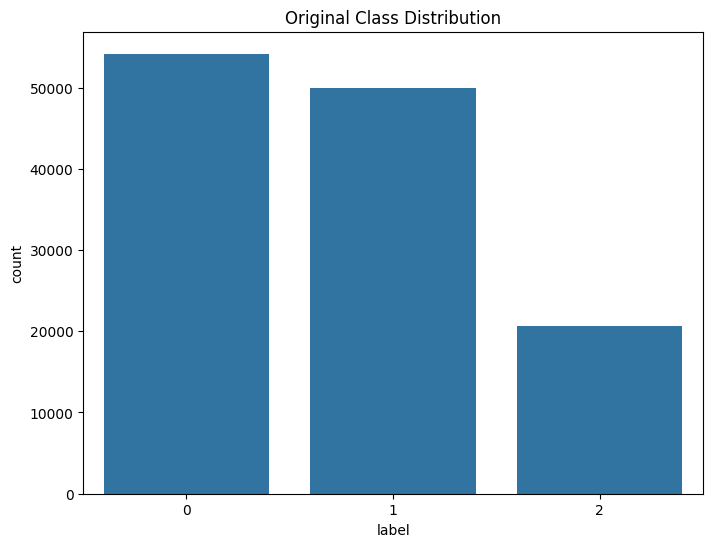

In [ ]:
texts, labels = zip(*fused_dataset)

data = pd.DataFrame({'text': texts, 'label': labels})

print("Original class distribution:", Counter(data['label']))
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x="label")
plt.title("Original Class Distribution")
plt.show()

Resampled class distribution: Counter({0: 54170, 1: 54170, 2: 54170})


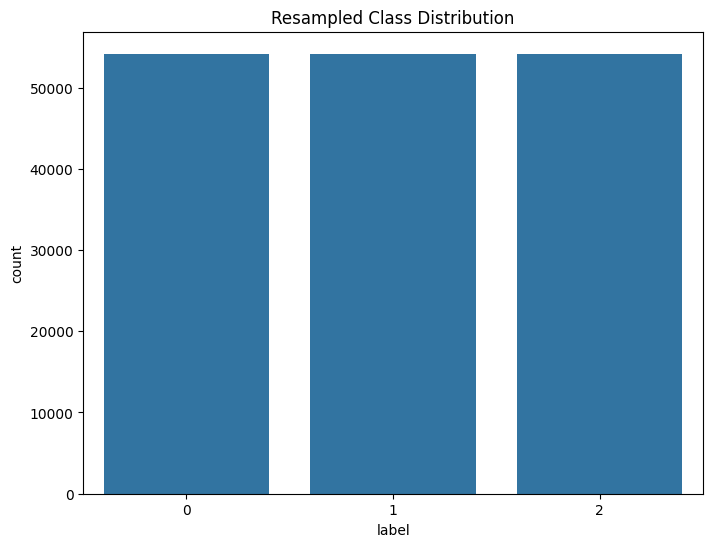

In [ ]:
X = data['text'].values.reshape(-1, 1)  # Texts
y = data['label']  # Labels

oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X, y)

df_resampled = pd.DataFrame(X_resampled, columns=['text'])
df_resampled['label'] = y_resampled

print("Resampled class distribution:", Counter(df_resampled['label']))
plt.figure(figsize=(8, 6))
sns.countplot(data=df_resampled, x="label")
plt.title("Resampled Class Distribution")
plt.show()


In [ ]:
X_train, X_val, y_train, y_val = train_test_split(df_resampled['text'], df_resampled['label'], test_size=0.2, random_state=42)

vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_val_vec = vectorizer.transform(X_val)

In [ ]:
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'], 
    'solver': ['lbfgs']
}

lr_model = GridSearchCV(LogisticRegression(max_iter=1000), param_grid_lr, cv=3, scoring='accuracy')
lr_model.fit(X_train_vec, y_train)

print("Best Logistic Regression Parameters:", lr_model.best_params_)
print("Validation Accuracy:", lr_model.score(X_val_vec, y_val))

Best Logistic Regression Parameters: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
Validation Accuracy: 0.9665866715894407


In [ ]:
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [10, 50, None],
    'min_samples_split': [2, 5],
}

rf_model = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=3, scoring='accuracy')
rf_model.fit(X_train_vec, y_train)

print("Best Random Forest Parameters:", rf_model.best_params_)
print("Validation Accuracy:", rf_model.score(X_val_vec, y_val))

Best Random Forest Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Validation Accuracy: 0.9415728262876131


In [ ]:
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf']
}

svm_model = GridSearchCV(SVC(), param_grid_svm, cv=3, scoring='accuracy')
svm_model.fit(X_train_vec, y_train)

print("Best SVM Parameters:", svm_model.best_params_)
print("Validation Accuracy:", svm_model.score(X_val_vec, y_val))

Best SVM Parameters: {'C': 10, 'kernel': 'linear'}
Validation Accuracy: 0.9665559042520461


In [ ]:
# Define variable name
amthcc = {
    # Logistic Regression
    "Logistic Regression": {
        "Test Accuracy": lr_model.score(X_val_vec, y_val),
        "Classification Report": classification_report(y_val, lr_model.predict(X_val_vec)),
        "Confusion Matrix": confusion_matrix(y_val, lr_model.predict(X_val_vec))
    },

    # Random Forest
    "Random Forest": {
        "Test Accuracy": rf_model.score(X_val_vec, y_val),
        "Classification Report": classification_report(y_val, rf_model.predict(X_val_vec)),
        "Confusion Matrix": confusion_matrix(y_val, rf_model.predict(X_val_vec))
    },

    # SVM
    "SVM": {
        "Test Accuracy": svm_model.score(X_val_vec, y_val),
        "Classification Report": classification_report(y_val, svm_model.predict(X_val_vec)),
        "Confusion Matrix": confusion_matrix(y_val, svm_model.predict(X_val_vec))
    }
}

# Display results
for model, metrics in amthcc.items():
    print(f"--- {model} ---")
    print(f"Test Accuracy: {metrics['Test Accuracy']}")
    print("Classification Report:\n", metrics['Classification Report'])
    print("Confusion Matrix:\n", metrics['Confusion Matrix'])
    print()


--- Logistic Regression ---
Test Accuracy: 0.9665866715894407
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.99      0.95     10888
           1       1.00      0.91      0.96     10597
           2       0.99      1.00      0.99     11017

    accuracy                           0.97     32502
   macro avg       0.97      0.97      0.97     32502
weighted avg       0.97      0.97      0.97     32502

Confusion Matrix:
 [[10764     1   123]
 [  909  9688     0]
 [   53     0 10964]]

--- Random Forest ---
Test Accuracy: 0.9415728262876131
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.93      0.91     10888
           1       0.99      0.89      0.94     10597
           2       0.95      1.00      0.97     11017

    accuracy                           0.94     32502
   macro avg       0.94      0.94      0.94     32502
weighted avg       0.94      0.94      0.94

In [ ]:
import pickle

with open('../models/combine/combine_tfidf_vectorizer.pkl', 'wb') as vectorizer_file:
    pickle.dump(vectorizer, vectorizer_file)

with open('../models/combine/combine_logistic_regression_model.pkl', 'wb') as model_file:
    pickle.dump(lr_model, model_file)

with open('../models/combine/combine_random_forest_model.pkl', 'wb') as model_file:
    pickle.dump(rf_model, model_file)

with open('../models/combine/combine_svm_model.pkl', 'wb') as model_file:
    pickle.dump(svm_model, model_file)